Amanda Rodgers
StudyTechniques Predictive Models

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy import stats
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as ns
import plotly.express as px

In [ ]:
# import pandas as pd
# import matplotlib as plt
# import seaborn as ns
# import plotly.express as px

# study_tech_data = pd.read_csv("StudyTechniques.csv")

In [3]:
study_tech_data = pd.read_csv("/Users/amandarodgers/Documents/Data_Bootcamp/Python/data_sets/StudyTechniques.csv")
study_tech_data

StudentID     Technique  Score  PriorGPA
0         1001      Standard     85       3.5
1         1002     Mnemonics     92       3.7
2         1003  Self-testing     89       3.2
3         1004   Group Study     87       3.6
4         1005      Standard     78       3.1
..         ...           ...    ...       ...
544       1545      Standard     91       3.7
545       1546     Mnemonics     84       3.2
546       1547  Self-testing     88       3.9
547       1548   Group Study     82       3.0
548       1549      Standard     98       3.4

[549 rows x 4 columns]

In [4]:
study_tech_data.head()

StudentID     Technique  Score  PriorGPA
0       1001      Standard     85       3.5
1       1002     Mnemonics     92       3.7
2       1003  Self-testing     89       3.2
3       1004   Group Study     87       3.6
4       1005      Standard     78       3.1

In [25]:
study_tech_data.describe(include = "all")
# all will tell you how many levels in each group, ex. how many techniques
# NaN = can compute a mean on a string
# mean and medium are almost same
# double std to give range of 1 std
# mean gpa is 3.5, so these are high performing students

StudentID Technique       Score    PriorGPA
count        549       549  549.000000  549.000000
unique       549         4         NaN         NaN
top         1001  Standard         NaN         NaN
freq           1       138         NaN         NaN
mean         NaN       NaN   87.692168    3.502550
std          NaN       NaN    6.641906    0.272513
min          NaN       NaN   76.000000    3.000000
25%          NaN       NaN   82.000000    3.300000
50%          NaN       NaN   88.000000    3.500000
75%          NaN       NaN   93.000000    3.700000
max          NaN       NaN  100.000000    3.900000

In [8]:
study_tech_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   StudentID  549 non-null    int64  
 1   Technique  549 non-null    object 
 2   Score      549 non-null    int64  
 3   PriorGPA   549 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 17.3+ KB


In [10]:
# mean of column Score
study_tech_data['Score'].mean()

87.69216757741349

In [12]:
# check the distribution of the numeric variable
# wanted to see if anything was repeated, so don't have repeated measures
px.histogram(study_tech_data, x = "StudentID")

In [15]:
#convert the id from integer to string (.apply(str))
# or can add underscore and will change to string
study_tech_data['StudentID'] = study_tech_data['StudentID'].apply(str)

In [14]:
study_tech_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   StudentID  549 non-null    object 
 1   Technique  549 non-null    object 
 2   Score      549 non-null    int64  
 3   PriorGPA   549 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 17.3+ KB


In [16]:
#check the distribution of the numeric variables
px.histogram(study_tech_data, x = "Score")

In [20]:
# mean score around, 75% students score btwn 88 and 89
# 14% of students have the target grade or are roughly at the mean
target = 75/549*100
target

13.661202185792352

In [21]:
#check the distribution of the numeric variables
px.histogram(study_tech_data, x = "PriorGPA")

In [22]:
# min 3 and max 3.9
# can calc what % of students are at a certain gpa

In [23]:
#Telling a story
# Remember to reset index after groupby

#First let's see how many techniques there are
study_tech_data.groupby(['Technique']).count()

StudentID  Score  PriorGPA
Technique                               
Group Study         137    137       137
Mnemonics           137    137       137
Self-testing        137    137       137
Standard            138    138       138

In [27]:
# h.m. students use each technique
px.bar(study_tech_data, x = 'Technique')

In [28]:
#create a new object with the summarized data
subset_data = study_tech_data[["Technique", "PriorGPA"]]
subset_data

Technique  PriorGPA
0        Standard       3.5
1       Mnemonics       3.7
2    Self-testing       3.2
3     Group Study       3.6
4        Standard       3.1
..            ...       ...
544      Standard       3.7
545     Mnemonics       3.2
546  Self-testing       3.9
547   Group Study       3.0
548      Standard       3.4

[549 rows x 2 columns]

In [29]:
# find average gpa by study group
#create a grouped column
grouped_data = subset_data.groupby(["Technique"]).mean()
grouped_data

PriorGPA
Technique             
Group Study   3.511679
Mnemonics     3.491971
Self-testing  3.467883
Standard      3.538406

<Axes: title={'center': 'Mean Prior GPA by Technique'}, xlabel='Technique', ylabel='GPA'>

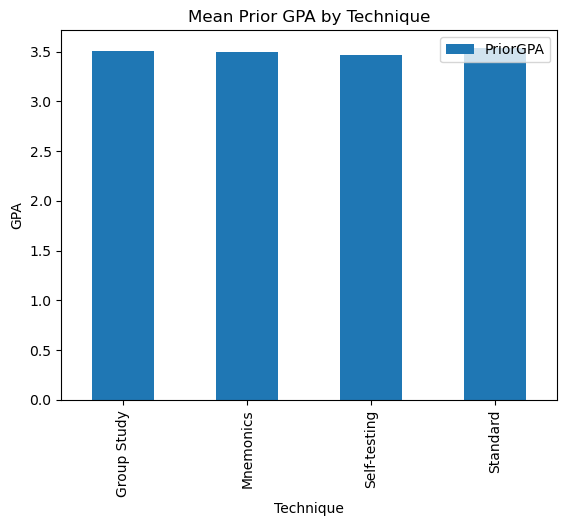

In [31]:
# don't have to reset index if use below, grouped data are their own objects in python and has functions like plot
grouped_data.plot(kind = 'bar',
                              title = "Mean Prior GPA by Technique",
                              xlabel = "Technique",
                              ylabel = "GPA")


In [34]:
# they are all close to 3.5, so regardless of how they study they get A's
# nothing gained from diff study methods, we accept null hypothesis then

In [44]:
# y is dependant on x
##Building a model

#Hypothesis: Study technique has no effect on GPA
#Linear model formula is Y ~ X
# Prior_GPA ~ Technique

import numpy as np 
import matplotlib.pyplot as plt #for plotting
from sklearn.linear_model import LinearRegression

#using the subset which has the 2 columns
#get dummies
dummies = pd.get_dummies(subset_data['Technique']) #subset_data.Technique
model_data = subset_data.join(dummies)

X = model_data[['Group Study', 'Mnemonics', 'Self-testing', 'Standard']]
Y = model_data[['PriorGPA']]
linear_regressor = LinearRegression() #creates the regression object

linear_regressor.fit(X,Y) #fit the model
linear_regressor.coef_   #gives you the coefficients

#What is the predicted GPA for a student who uses the Standard Technique
predicted_GPA = linear_regressor.predict([[0,0,0,1]]) #make a prediction
predicted_GPA

#What is the predicted GPA for a student who uses Group Study
predicted_GPA = linear_regressor.predict([[1,0,0,0]]) #make a prediction
predicted_GPA

#What is the predicted GPA for a student who uses Self-testing Study
predicted_GPA = linear_regressor.predict([[0,0,1,0]]) #make a prediction
predicted_GPA

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([[3.46777344]])

In [36]:
# error above means it is not registering the model but still okay
# dummie variables used in models to account for records, create dummie variables for technique
# makes 0 and 1 to show which test they took, run dummies to see the structure
# 0 for false 1 for true
dummies

Group Study  Mnemonics  Self-testing  Standard
0          False      False         False      True
1          False       True         False     False
2          False      False          True     False
3           True      False         False     False
4          False      False         False      True
..           ...        ...           ...       ...
544        False      False         False      True
545        False       True         False     False
546        False      False          True     False
547         True      False         False     False
548        False      False         False      True

[549 rows x 4 columns]

In [37]:
model_data

Technique  PriorGPA  Group Study  Mnemonics  Self-testing  Standard
0        Standard       3.5        False      False         False      True
1       Mnemonics       3.7        False       True         False     False
2    Self-testing       3.2        False      False          True     False
3     Group Study       3.6         True      False         False     False
4        Standard       3.1        False      False         False      True
..            ...       ...          ...        ...           ...       ...
544      Standard       3.7        False      False         False      True
545     Mnemonics       3.2        False       True         False     False
546  Self-testing       3.9        False      False          True     False
547   Group Study       3.0         True      False         False     False
548      Standard       3.4        False      False         False      True

[549 rows x 6 columns]

In [38]:
X

Group Study  Mnemonics  Self-testing  Standard
0          False      False         False      True
1          False       True         False     False
2          False      False          True     False
3           True      False         False     False
4          False      False         False      True
..           ...        ...           ...       ...
544        False      False         False      True
545        False       True         False     False
546        False      False          True     False
547         True      False         False     False
548        False      False         False      True

[549 rows x 4 columns]

In [39]:
Y

PriorGPA
0         3.5
1         3.7
2         3.2
3         3.6
4         3.1
..        ...
544       3.7
545       3.2
546       3.9
547       3.0
548       3.4

[549 rows x 1 columns]

In [40]:
# .fit is doing the regression equation: Simple Linear Regression Formula
# your looking for a beta for each of the study groups, your fitting the line with x and y
# need the coef to get the coefficient to get the model, the association btwn variables

In [42]:
#linear_regressor.coef_   #gives you the coefficients
# can run above to see the coeff for all techniques
# if you can't prove the model on a plot, it's probably wrong or you are using the wrong plot
# plot the means to see, because all of these fancy test are based on mean

In [43]:
#What is the predicted GPA for a student who uses the Standard Technique
predicted_GPA = linear_regressor.predict([[0,0,0,1]]) #make a prediction
predicted_GPA
# can run other ones independently to see coefficient

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([[3.54101562]])

In [46]:
#Understanding coefficients, just for demonstration
Y ~ A + B
Y ~ 2A + B

Income ~ 2(Age) +  Height

PriorGPA ~ Group Study +  Mnemonics + Self-testing + Standard

PriorGPA ~ 3.1(Group Study) + 3.1(Mnemonics) + 3.1(Self-testing) + 3.1(Standard)

SyntaxError: invalid decimal literal (2552009481.py, line 3)

In [48]:
# above was machine learning style of prediction, it likes to have a lot of columns
# below is stats model
#Option two for R style summary
# ols = trendline = ordinary linear squares

from statsmodels.formula.api import ols
model = ols('PriorGPA ~ Technique', data=subset_data)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               PriorGPA   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.661
Date:                Wed, 22 May 2024   Prob (F-statistic):              0.174
Time:                        18:31:00   Log-Likelihood:                -62.261
No. Observations:                 549   AIC:                             132.5
Df Residuals:                     545   BIC:                             149.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     3.5117      0.023    151.103      0.000       3.466       3.557
Technique[T.Mnemonics]       -0.0197      0.033     -0.600      0.549      -0.084       0.045
Technique[T.Self-testing]    -0.0438      0.033     -1.333      0.183      -0.108       0.021
Technique[T.Standard]         0.0267      0.033      0.815      0.416      -0.038       0.091
==============================================================================
Omnibus:                      175.866   Durbin-Watson:                   2.586
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.181
Skew:                          -0.218   Prob(JB):                     1.69e-07
Kurtosis:                       1.917   Cond. No.                         4.80
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
# first model you built it so you could do prediction
# the one above is to just to get info so you can understand the model
# look for coefficient: 
# intercept is 3.5 is baseline, it got slightly higher or lower b. all close
# look for direction of coefficient, for mnemonics it is negative, below the mean
# the only group that is higher than group study is self study

In [50]:
# how to check your that your model is working
# show coef and t stats , have different directions and t stat ahve directions and p values not significant, show plot
# for validation